#Google Stock Price Prediction

The "Google Stock Price Prediction" model leverages advanced deep learning techniques, specifically Long Short-Term Memory (LSTM) neural networks, to forecast future stock prices. Developed using the TensorFlow and Keras libraries, the model incorporates layers of LSTM units, known for their ability to capture and learn patterns in sequential data, making them particularly well-suited for time-series predictions. The use of MinMaxScaler ensures the normalization of stock prices, enhancing the model's training efficiency. With the power of LSTM networks, this technology-driven solution aims to analyze historical data and uncover intricate patterns, providing valuable insights for predicting Google's stock prices with a focus on enhancing decision-making in financial markets.

Download dataset - https://www.kaggle.com/datasets/rahulsah06/gooogle-stock-price

In [1]:
!unzip  /content/Dataset.zip

Archive:  /content/Dataset.zip
  inflating: Google_Stock_price_dataset/Google_Stock_Price_Test.csv  
  inflating: Google_Stock_price_dataset/Google_Stock_Price_Train.csv  


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [26]:
dataset_train = pd.read_csv('/content/Google_Stock_price_dataset/Google_Stock_Price_Train.csv')


In [27]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [28]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [29]:
training_set = dataset_train.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)



In [30]:
training_set_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [31]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [32]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

print(regressor.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [47]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 34)

Epoch 1/100
36/36 [==============================] - 4s 112ms/step - loss: 7.6280e-04
Epoch 2/100
36/36 [==============================] - 4s 111ms/step - loss: 7.9381e-04
Epoch 3/100
36/36 [==============================] - 6s 164ms/step - loss: 8.9325e-04
Epoch 4/100
36/36 [==============================] - 4s 113ms/step - loss: 7.6091e-04
Epoch 5/100
36/36 [==============================] - 4s 111ms/step - loss: 7.9021e-04
Epoch 6/100
36/36 [==============================] - 6s 163ms/step - loss: 7.6471e-04
Epoch 7/100
36/36 [==============================] - 4s 112ms/step - loss: 7.9612e-04
Epoch 8/100
36/36 [==============================] - 4s 112ms/step - loss: 8.3042e-04
Epoch 9/100
36/36 [==============================] - 6s 163ms/step - loss: 7.2564e-04
Epoch 10/100
36/36 [==============================] - 4s 111ms/step - loss: 7.1650e-04
Epoch 11/100
36/36 [==============================] - 4s 112ms/step - loss: 7.4852e-04
Epoch 12/100
36/36 [==============================] 

In [48]:
dataset_test = pd.read_csv('/content/Google_Stock_price_dataset/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [49]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [50]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [51]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 41ms/step


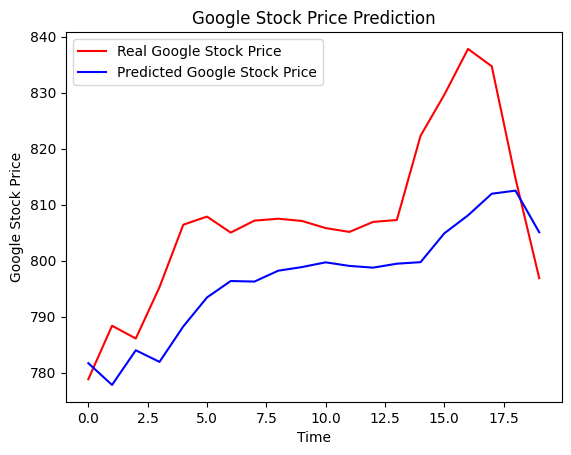

In [52]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#Conclusion

The results of the "Google Stock Price Prediction" model are visualized through a comparison of predicted stock prices, depicted by the blue curve, against the actual values represented by the red curve. While the model may not achieve perfect accuracy, it demonstrates competence in capturing significant spikes or turning points in the stock price trends. Despite inherent challenges, such as market volatility and unpredictable events, the model showcases its ability to identify key inflection points in the stock price trajectory, offering valuable insights for investors and analysts navigating the dynamic landscape of financial markets.